In [21]:
import numpy as np
import pandas as pd
import re
import numpy
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from IPython.display import clear_output

featurestrain=pd.read_csv('newfeatures2016.csv')
count=0
for i in range(0,len(featurestrain.index)):
    count = count + featurestrain.loc[i, 'winner']
count=count/len(featurestrain.index)
print('The accuracy of the train dataset with only using RANK to predict is ' + str(count))


featuresvalidate=pd.read_csv('newfeatures2017.csv')
count=0
for i in range(0,len(featuresvalidate.index)):
    count = count + featuresvalidate.loc[i, 'winner']
count=count/len(featuresvalidate.index)
print('The accuracy of the validate dataset with only using RANK to predict is ' + str(count))


#featurestest=pd.read_csv('predictfeatures2019.csv')
featurestest=pd.read_csv('predictfeatures2018.csv')

count=0
for i in range(0,len(featurestest.index)):
    count = count + featurestest.loc[i, 'winner']
count=count/len(featurestest.index)
print('The accuracy of the test dataset with only using RANK to predict is ' + str(count))

featurestest

The accuracy of the train dataset with only using RANK to predict is 0.6632358995471387
The accuracy of the validate dataset with only using RANK to predict is 0.6479873717442778
The accuracy of the test dataset with only using RANK to predict is 0.6562731997030438


,Unnamed: 0,RANK,POINTS,FS,W1SP,W2SP,WSP,WRP,TPW,TMW,ACES,DF,BP,COMPLETE,SERVEADV,winner,player1,player2
0,0,-5.0,101.0,-0.051428,0.161599,0.022027,0.098450,0.026690,0.060640,-1.000000,0.150835,0.100306,0.148810,0.048016,0.125139,1,Ryan Harrison,Leonardo Mayer
1,1,-40.0,297.0,-0.066797,0.079270,0.025266,0.043220,0.030290,-0.002148,-1.000000,0.076510,0.035087,0.030252,0.030037,0.073510,1,Jared Donaldson,Jordan Thompson
2,2,-33.0,582.0,-0.000786,-0.062417,-0.019473,-0.050863,0.079075,-0.033556,1.000000,-0.260768,0.015560,-0.205660,0.026543,0.028211,0,Damir Dzumhur,Denis Istomin
3,3,-164.0,810.0,-0.052330,0.017129,-0.055798,-0.022380,-0.043744,-0.021041,1.000000,0.064956,0.005133,0.233550,-0.032723,-0.066125,0,Steve Johnson,Alex De Minaur
4,4,-107.0,456.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,Federico Delbonis,Michael Mmoh
5,5,-185.0,1067.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,Mischa Zverev,John Patrick Smith
6,6,-12.0,444.0,0.048397,-0.070901,0.010364,-0.030121,0.088651,0.032827,1.000000,-0.207601,-0.036961,-0.095267,0.042676,0.058530,0,Diego Sebastian Schwartzman,Alexandr Dolgopolov
7,7,-54.0,270.0,0.186277,-0.063867,0.016720,-0.007590,0.019952,0.008304,-1.000000,-0.067342,0.034539,-0.016667,0.019602,0.012361,1,Horacio Zeballos,Ernesto Escobedo
8,8,-3.0,8.0,0.093162,-0.041499,0.051487,0.020236,-0.009325,0.000000,-1.000000,-0.089202,-0.104674,-0.074074,-0.005077,0.010912,1,Matthew Ebden,Francis Tiafoe
9,9,-33.0,851.0,-0.004725,0.079623,-0.014964,0.031128,-0.084601,-0.040367,1.000000,0.350283,0.007355,0.079338,-0.045844,-0.053472,0,Gilles Muller,Hyeon Chung


Para obtener los resultados, se empiezan seleccionando los parámetros de interés. En general, se descarta el uso del parámetro 'RANK' y 'POINTS'. El mismo sólo se utiliza para 'acomodar' el órden de los jugadores. Se puede ver como aproximadamente, en el 65% de los partidos gana el jugador con mayor ranking. Este sería el 'accuracy' base del proyecto, si el accuracy del modelo da menor a ese valor se debe descartarlo. El descarte de dichos parámetros se realiza para evitar distorsionar las predicciones.

In [17]:
#featurestrain = featurestrain.filter(['RANK','FS','W1SP','W2SP','WSP','WRP','TPW','TMW','ACES','DF','BP','COMPLETE','SERVEADV','winner','player1','player2'], axis=1)
#featuresvalidate = featuresvalidate.filter(['RANK','FS','W1SP','W2SP','WSP','WRP','TPW','TMW','ACES','DF','BP','COMPLETE','SERVEADV','winner','player1','player2'], axis=1)
#featurestest = featurestest.filter(['RANK','FS','W1SP','W2SP','WSP','WRP','TPW','TMW','ACES','DF','BP','COMPLETE','SERVEADV','winner','player1','player2'], axis=1)

featurestrain = featurestrain.filter(['RANK','FS','W1SP','W2SP','WSP','WRP','TPW','TMW','ACES','DF','BP','COMPLETE','SERVEADV','winner','player1','player2'], axis=1)
featuresvalidate = featuresvalidate.filter(['RANK','FS','W1SP','W2SP','WSP','WRP','TPW','TMW','ACES','DF','BP','COMPLETE','SERVEADV','winner','player1','player2'], axis=1)
featurestest = featurestest.filter(['RANK','FS','W1SP','W2SP','WSP','WRP','TPW','TMW','ACES','DF','BP','COMPLETE','SERVEADV','winner','player1','player2'], axis=1)

#featurestrain = featurestrain.filter(['RANK','FS','W1SP','W2SP','WSP','WRP','TPW','ACES','DF','BP','COMPLETE','SERVEADV','winner','player1','player2'], axis=1)
#featuresvalidate = featuresvalidate.filter(['RANK','FS','W1SP','W2SP','WSP','WRP','TPW','ACES','DF','BP','COMPLETE','SERVEADV','winner','player1','player2'], axis=1)
#featurestest = featurestest.filter(['RANK','FS','W1SP','W2SP','WSP','WRP','TPW','ACES','DF','BP','COMPLETE','SERVEADV','winner','player1','player2'], axis=1)


X_train = featurestrain.iloc[:, featurestrain.columns.get_loc('TMW'):featurestrain.columns.get_loc('ACES')].values
y_train = featurestrain.iloc[:, featurestrain.columns.get_loc('winner')].values

X_validate = featuresvalidate.iloc[:, featuresvalidate.columns.get_loc('TMW'):featuresvalidate.columns.get_loc('ACES')].values
y_validate = featuresvalidate.iloc[:, featuresvalidate.columns.get_loc('winner')].values

X_test = featurestest.iloc[:, featurestest.columns.get_loc('TMW'):featurestest.columns.get_loc('ACES')].values
y_test = featurestest.iloc[:, featurestest.columns.get_loc('winner')].values

In [18]:
#X_train=X_train*(-1)
#X_validate=X_validate*(-1)
X_test=X_test*(-1)

A continuación se arma la red MLP correspondiente. Se tienen que tener en cuenta los siguientes parámetros:
- La activación de la capa de salida será 'sigmoid'. Ya que necesito saber la probabilidad de que el jugador mejor rankeado gane, la función de activación tiene los valores entre 0 y 1, y si es mayor a 0.5, gana el jugador con mayor ranking, si es menor, el de menor ranking.
- Se utiliza batch normalization para normalizar los datos presentes en la entrada. Se logra un mayor learning rate. También este parámetro ayuda a regularizar, así evitar overfitting.
- Se utilizan dos layers ocultas. El número de neuronas se determinó con varias iteraciones, quedándose con un número de neuronas menor al doble del parámetro de entrada.

c:\users\cufar\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, kernel_initializer="uniform", activation="relu", units=6)`
  after removing the cwd from sys.path.
c:\users\cufar\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  
c:\users\cufar\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
c:\users\cufar\anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
Train on 2429 samples, validate on 2534 samples
Epoch 1/10
2429/2429 [==============================] - 1s 277us/step - loss: 0.6168 - acc: 0.6620 - val_loss: 0.4798 - val_acc: 0.6480
Epoch 2/10
2429/2429 [==============================] - 0s 193us/step - loss: 0.3742 - acc: 0.6686 - val_loss: 0.3214 - val_acc: 0.9491
Epoch 3/10
2429/2429 [==============================] - 1s 238us/step - loss: 0.2838 

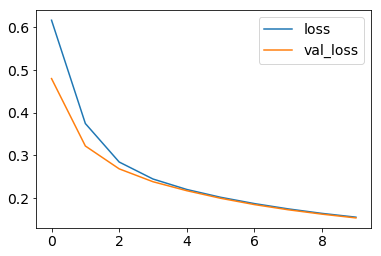

In [19]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
#classifier.add(BatchNormalization())

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
#classifier.add(BatchNormalization())

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 10, validation_data=(X_validate, y_validate),callbacks=[plot_losses])

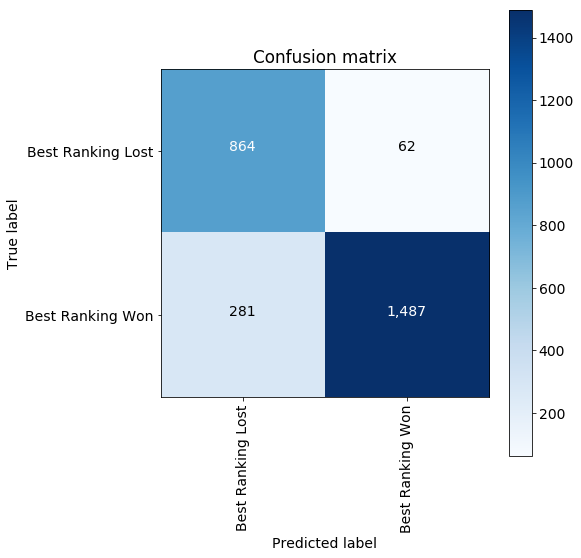

The accuracy of this iteration is 87.26800296956199 %.
The ratio of best rank players that win is 65.62731997030437 %.
The predicted ratio of best rank players that win is 57.498144023756495 %.


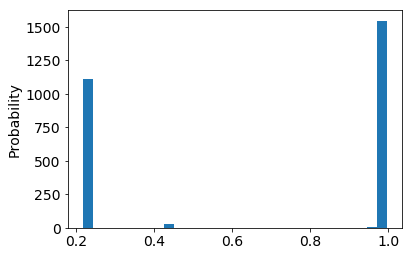

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred2 = (y_pred > 0.5)


cm = confusion_matrix(y_test, y_pred2)

#btp: best true predict, bfp: best false predict, wtp: worsetruepredict, wfp: worse false predict
wtp=cm[0,0]
wfp=cm[0,1]
btp=cm[1,1]
bfp=cm[1,0]

plot_confusion_matrix( cm = (cm), normalize= False, target_names = ['Best Ranking Lost', 'Best Ranking Won'] )

acc = accuracy_score(y_test, y_pred2, normalize=True, sample_weight=None)
print('The accuracy of this iteration is ' + str(acc*100) + ' %.')
print('The ratio of best rank players that win is ' + str(((btp+bfp)/(btp+bfp+wtp+wfp))*100) + ' %.')
print('The predicted ratio of best rank players that win is ' + str(((btp+wfp)/(btp+bfp+wtp+wfp))*100) + ' %.')

plt.hist(y_pred, bins=30)
plt.ylabel('Probability');

El accuracy obtenido fue muy satisfactorio. Se puede observar en la matriz de confusión que los casos más raro de errores de detección surgen cuando se predice que gana el jugador con menor ranking.

Debajo se muestra que la opción de descartar el parámetro 'RANK' fue acertada, obteniéndose un accurracy mucho menor. Se puede ver como hay un overfitting exagerado gracias a dicho parámetro, el histograma no está distribuido entre ambos jugadores.

Para analizar el funcionamiento de la red, se analiza un caso en particular. Tomándose como ejemplo a Roger Federer, el cual gana la gran mayoría de sus partidos.

In [63]:
exp1=featurestest['player1'].isin(['Roger Federer'])
exp2=featurestest['player2'].isin(['Roger Federer'])

matches_federer=featurestest.loc[(exp1)]

X_test_federer = matches_federer.iloc[:, matches_federer.columns.get_loc('FS'):matches_federer.columns.get_loc('winner')].values
y_test_federer = matches_federer.iloc[:, matches_federer.columns.get_loc('winner')].values

X_test_federer

array([[ 2.00328457e-02,  1.89101820e-01,  1.68505288e-01,
         1.84469003e-01,  1.04479885e-01,  2.26691453e-02,
         1.00000000e+00,  5.75450401e-02, -3.37001560e-02,
         1.69672920e-01,  1.24208975e-01,  2.88948888e-01],
       [ 1.23763614e-01,  5.56453278e-02,  1.16079935e-01,
         1.09210918e-01,  5.78970350e-02,  3.11840407e-02,
         1.00000000e+00,  9.97074938e-02, -8.99321109e-02,
         8.53458684e-02,  7.81923988e-02,  1.67107953e-01],
       [-1.51732047e-02,  8.80569188e-02,  6.40173724e-02,
         7.52703389e-02,  8.21645521e-02,  8.49730574e-03,
        -1.00000000e+00,  2.00823460e-01, -1.69546560e-02,
        -3.25980170e-02,  8.22462923e-02,  1.57434891e-01],
       [ 1.54375838e-01, -3.68962856e-02,  8.51284561e-02,
         4.70624162e-02, -1.05698364e-02, -6.24892145e-02,
         1.00000000e+00,  2.28458165e-01, -9.05870445e-03,
         1.50000000e-01,  8.77113232e-03,  3.64925798e-02],
       [ 7.10052502e-02,  4.34861403e-02,  6.6661713

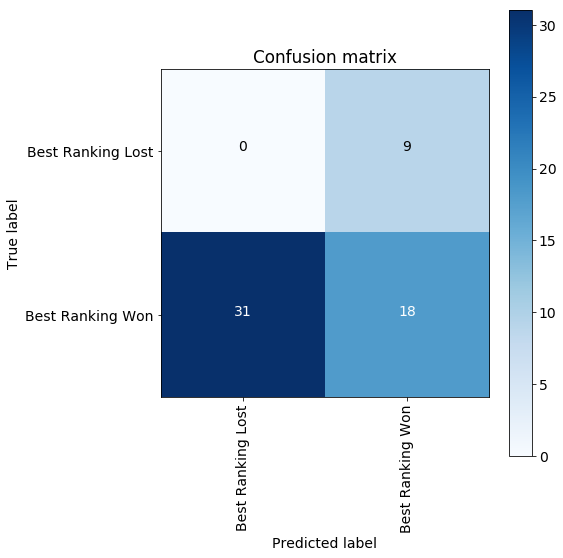

The accuracy of this iteration is 31.03448275862069 %.
The ratio of best rank players that win is 84.48275862068965 %.
The predicted ratio of best rank players that win is 46.55172413793103 %.


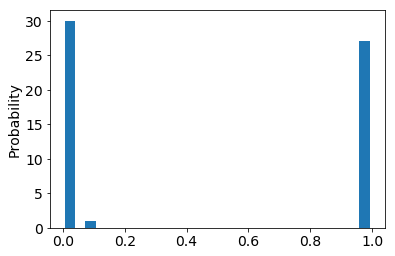

In [64]:
y_pred_federer = classifier.predict(X_test_federer)
y_pred_federer2 = (y_pred_federer > 0.5)
cm = confusion_matrix(y_test_federer, y_pred_federer2)

#btp: best true predict, bfp: best false predict, wtp: worsetruepredict, wfp: worse false predict
wtp=cm[0,0]
wfp=cm[0,1]
btp=cm[1,1]
bfp=cm[1,0]

plot_confusion_matrix( cm = (cm), normalize= False, target_names = ['Best Ranking Lost', 'Best Ranking Won'] )

acc = accuracy_score(y_test_federer, y_pred_federer2, normalize=True, sample_weight=None)
print('The accuracy of this iteration is ' + str(acc*100) + ' %.')
print('The ratio of best rank players that win is ' + str(((btp+bfp)/(btp+bfp+wtp+wfp))*100) + ' %.')
print('The predicted ratio of best rank players that win is ' + str(((btp+wfp)/(btp+bfp+wtp+wfp))*100) + ' %.')

plt.hist(y_pred_federer, bins=30)
plt.ylabel('Probability');

In [65]:
matches_federer['Prediction']=y_pred_federer2[:,0]
matches_federer

c:\users\cufar\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,RANK,FS,W1SP,W2SP,WSP,WRP,TPW,TMW,ACES,DF,BP,COMPLETE,SERVEADV,winner,player1,player2,Prediction
197,-49.0,0.020033,0.189102,0.168505,0.184469,0.104480,0.022669,1.000000,0.057545,-0.033700,0.169673,0.124209,0.288949,1,Roger Federer,Aljaz Bedene,False
229,-53.0,0.123764,0.055645,0.116080,0.109211,0.057897,0.031184,1.000000,0.099707,-0.089932,0.085346,0.078192,0.167108,1,Roger Federer,Jan Lennard Struff,False
245,-29.0,-0.015173,0.088057,0.064017,0.075270,0.082165,0.008497,-1.000000,0.200823,-0.016955,-0.032598,0.082246,0.157435,1,Roger Federer,Richard Gasquet,True
253,-78.0,0.154376,-0.036896,0.085128,0.047062,-0.010570,-0.062489,1.000000,0.228458,-0.009059,0.150000,0.008771,0.036493,1,Roger Federer,Marton Fucsovics,False
257,-18.0,0.071005,0.043486,0.066662,0.067747,0.056743,0.012691,-1.000000,0.144097,-0.004385,0.013820,0.061978,0.124490,1,Roger Federer,Tomas Berdych,True
259,-56.0,-0.014674,0.101265,0.193847,0.130175,-0.011071,-0.006291,1.000000,0.191054,-0.086989,0.108772,0.042537,0.119103,1,Roger Federer,Hyeon Chung,False
260,-4.0,0.051221,0.069767,0.075012,0.081215,0.002396,-0.007986,-1.000000,-0.025893,-0.047014,0.099833,0.032880,0.083610,1,Roger Federer,Marin Cilic,True
462,-114.0,-0.044438,0.107140,0.022836,0.069678,-0.001130,-0.002621,1.000000,0.137222,-0.030589,-0.037037,0.023327,0.068548,1,Roger Federer,Ruben Bemelmans,False
470,-34.0,0.069792,0.039430,0.127049,0.087095,0.075491,0.033091,-1.000000,0.236206,-0.034751,0.197915,0.080862,0.162586,1,Roger Federer,Philipp Kohlschreiber,True
474,-40.0,0.012207,0.048311,0.079761,0.064375,0.026332,0.002075,-1.000000,0.073558,-0.056298,0.104642,0.039622,0.090707,1,Roger Federer,Robin Haase,True


In [6]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8,8 ))
    font = {'size'   : 14}
    plt.rc('font', **font)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# updatable plot
# a minimal example (sort of)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        if epoch == (self.params.get('epochs')-1):
            plt.plot(self.x, self.losses, label="loss")
            plt.plot(self.x, self.val_losses, label="val_loss")
            plt.legend()
            plt.show();
        
plot_losses = PlotLosses()

In [5]:
X_train = featurestrain.iloc[:, featurestrain.columns.get_loc('RANK'):featurestrain.columns.get_loc('winner')].values
y_train = featurestrain.iloc[:, featurestrain.columns.get_loc('winner')].values

X_validate = featuresvalidate.iloc[:, featuresvalidate.columns.get_loc('RANK'):featuresvalidate.columns.get_loc('winner')].values
y_validate = featuresvalidate.iloc[:, featuresvalidate.columns.get_loc('winner')].values

X_test = featurestest.iloc[:, featurestest.columns.get_loc('RANK'):featurestest.columns.get_loc('winner')].values
y_test = featurestest.iloc[:, featurestest.columns.get_loc('winner')].values

classifier = Sequential()

classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
classifier.add(BatchNormalization())
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 10, validation_data=(X_validate, y_validate),callbacks=[plot_losses])

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred2 = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred2)

#btp: best true predict, bfp: best false predict, wtp: worsetruepredict, wfp: worse false predict
wtp=cm[0,0]
wfp=cm[0,1]
btp=cm[1,1]
bfp=cm[1,0]

plot_confusion_matrix( cm = (cm), normalize= False, target_names = ['Best Ranking Lost', 'Best Ranking Won'] )

acc = accuracy_score(y_test, y_pred2, normalize=True, sample_weight=None)
print('The accuracy of this iteration is ' + str(acc*100) + ' %.')
print('The ratio of best rank players that win is ' + str(((btp+bfp)/(btp+bfp+wtp+wfp))*100) + ' %.')
print('The predicted ratio of best rank players that win is ' + str(((btp+wfp)/(btp+bfp+wtp+wfp))*100) + ' %.')

plt.hist(y_pred, normed=True, bins=30)
plt.ylabel('Probability');

c:\users\cufar\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=13, kernel_initializer="uniform", activation="relu", units=10)`
  if sys.path[0] == '':
c:\users\cufar\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=5, activation="relu", kernel_initializer="uniform")`
  
c:\users\cufar\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  app.launch_new_instance()


NameError: name 'plot_losses' is not defined